In [16]:
import os
import json
import pandas as pd
import numpy as np
from scipy.fft import fft
import matplotlib.pyplot as plt
import csv

In [17]:
# Pembacaan Parameter Dataset
filename = "parameter.json"
with open(filename, 'r') as f:
    params = json.load(f)

In [18]:
rr_target = []
hr_target = []
rr_phase = []
hr_phase = []
ext_rr_phase = []
ext_hr_phase = []

with open('./preprocessed_data/rr_wave.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        rr_target.append(lines)
        
with open('./preprocessed_data/hr_wave.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        hr_target.append(lines)
with open('./preprocessed_data/rr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        rr_phase.append(lines)
        
with open('./preprocessed_data/hr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        hr_phase.append(lines)
with open('./preprocessed_data/ext_rr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        ext_rr_phase.append(lines)
        
with open('./preprocessed_data/ext_hr_phase.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        ext_hr_phase.append(lines)

In [19]:
rr_target_array = []
hr_target_array = []
rr_phase_array = []
hr_phase_array = []
ext_rr_phase_array = []
ext_hr_phase_array = []
for i in range(0, 80, 2):
    rr_target_array.append(rr_target[i])
    hr_target_array.append(hr_target[i])
    rr_phase_array.append(rr_phase[i])
    hr_phase_array.append(hr_phase[i])
    ext_rr_phase_array.append(ext_rr_phase[i])
    ext_hr_phase_array.append(ext_hr_phase[i])
    
rr_target_array = np.array(rr_target_array).astype(np.float64)
hr_target_array = np.array(hr_target_array).astype(np.float64)
rr_phase_array = np.array(rr_phase_array).astype(np.float64)
hr_phase_array = np.array(hr_phase_array).astype(np.float64)
ext_rr_phase_array = np.array(ext_rr_phase_array).astype(np.float64)
ext_hr_phase_array = np.array(ext_hr_phase_array).astype(np.float64)

In [20]:
print(rr_phase_array.shape)
print(hr_phase_array.shape)
print(rr_target_array.shape)
print(hr_target_array.shape)
print(ext_rr_phase_array.shape)
print(ext_hr_phase_array.shape)

(40, 3000)
(40, 19500)
(40, 3000)
(40, 19500)
(40, 3000)
(40, 19500)


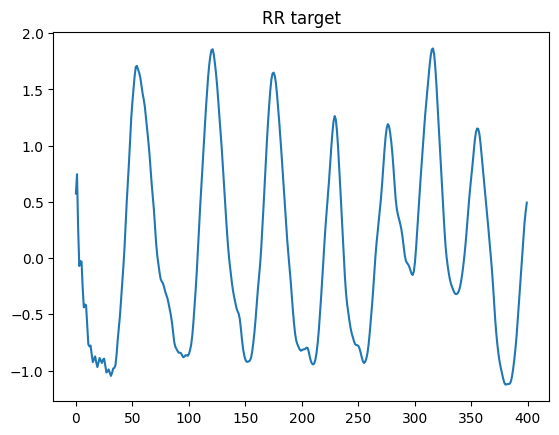

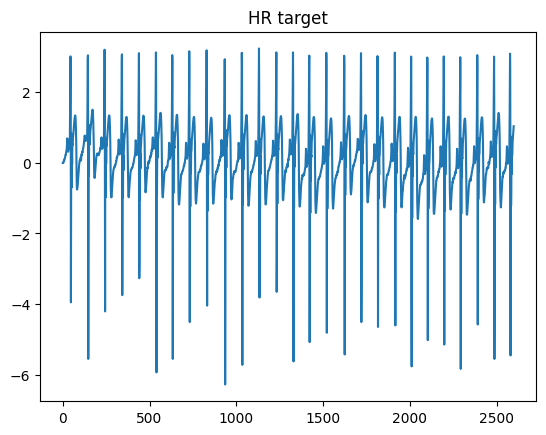

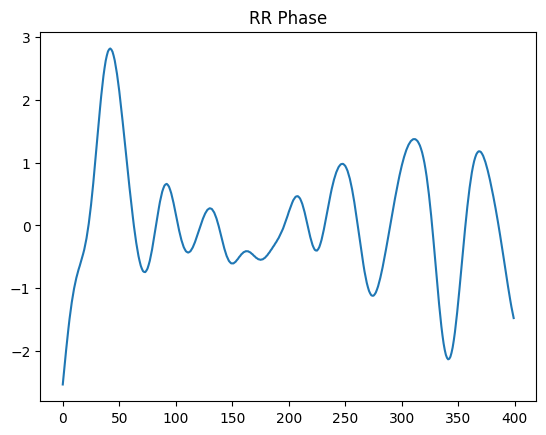

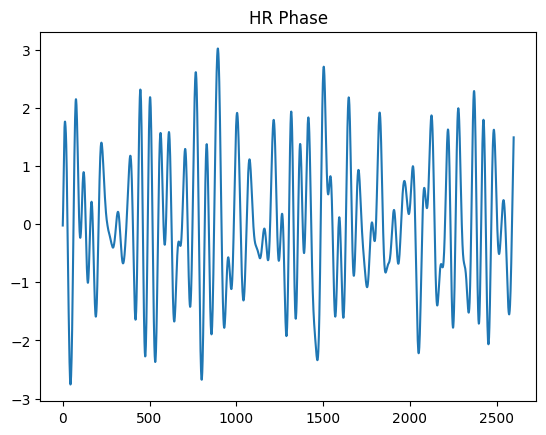

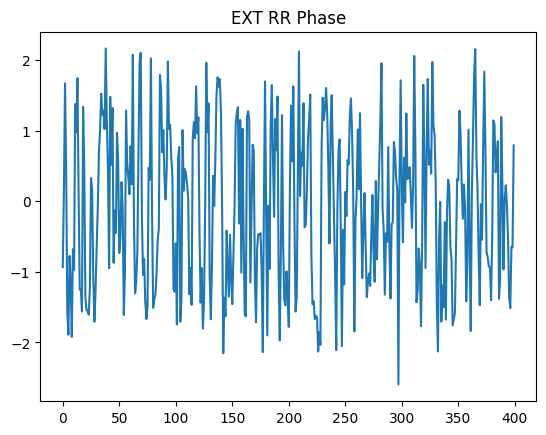

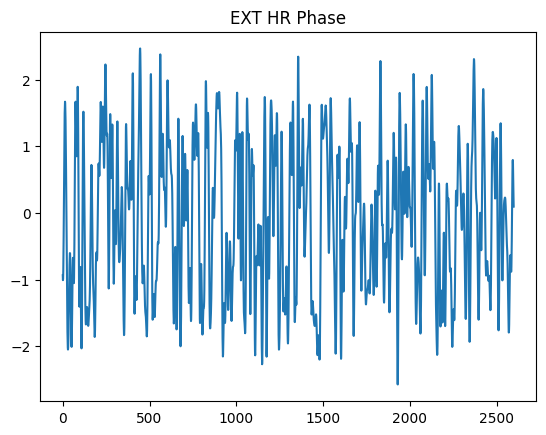

In [21]:
plt.figure(1)
plt.title("RR target")
plt.plot(rr_target_array[0][:400],label="RR target")
plt.figure(2)
plt.title("HR target")
plt.plot(hr_target_array[0][:2600],label="HR target")
plt.figure(3)
plt.title("RR Phase")
plt.plot(rr_phase_array[0][:400],label="RR Phase")
plt.figure(4)
plt.title("HR Phase")
plt.plot(hr_phase_array[0][:2600],label="HR Phase")
plt.figure(5)
plt.title("EXT RR Phase")
plt.plot(ext_rr_phase_array[0][:400],label="EXT RR Phase")
plt.figure(6)
plt.title("EXT HR Phase")
plt.plot(ext_hr_phase_array[0][:2600],label="EXT HR Phase")

In [22]:
def slide_win_rr(data):
    isi_dataVT =[]
    for k in range(len(data)):
        for i in range(101):
            if i == 0:
                index_1 = i
            else :
                index_1 = index_2 - 380
            index_2 = index_1 + 400
            vt_20s_1 = data[k][index_1:index_2]
        #print(index_1,index_2)
            isi_dataVT.append(vt_20s_1)

    return isi_dataVT

def slide_win_hr(data):
    isi_dataVT =[]
    for k in range(len(data)):
        for i in range(101):
            if i == 0:
                index_1 = i
            else :
                index_1 = index_2 - 2470
            index_2 = index_1 + 2600
            vt_20s_1 = data[k][index_1:index_2]
        #print(index_1,index_2)
            isi_dataVT.append(vt_20s_1)

    return isi_dataVT

In [23]:
rr_phase_array.shape

(40, 3000)

In [24]:
rr_phase_array

array([[-2.53175696, -2.34461198, -2.15599913, ..., -0.4264306 ,
        -0.3873922 , -0.35574928],
       [-1.44744488, -1.77647049, -2.0862873 , ...,  0.82229271,
         0.73935931,  0.64799325],
       [ 0.27565625, -0.41080179, -1.02893607, ..., -1.05092233,
        -0.96211439, -0.86458176],
       ...,
       [ 0.20510292,  0.53432951,  0.84602113, ..., -0.67001866,
        -0.62294442, -0.56846216],
       [ 1.29502411,  0.98223297,  0.67348187, ...,  0.69764199,
         0.62879176,  0.55964625],
       [-1.13979803, -1.37827736, -1.60585038, ...,  1.0144359 ,
         0.90120427,  0.78337045]])

In [25]:
slide_rr_phase = np.array(slide_win_rr(rr_phase_array))
slide_hr_phase = np.array(slide_win_hr(hr_phase_array))
slide_rr_target = np.array(slide_win_rr(rr_target_array))
slide_hr_target = np.array(slide_win_hr(hr_target_array))
slide_ext_rr = np.array(slide_win_rr(ext_rr_phase_array))
slide_ext_hr = np.array(slide_win_hr(ext_hr_phase_array))

In [26]:
print(slide_rr_phase.shape, slide_rr_target.shape, slide_hr_phase.shape, slide_hr_target.shape, slide_ext_rr.shape, slide_ext_hr.shape)

(4040, 400) (4040, 400) (4040, 2600) (4040, 2600) (4040, 400) (4040, 2600)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l1_l2
import keras_tuner

input_shape = (400, 1)  # Input shape dari data radar
output_shape = (400, 1)  # Output shape untuk sinyal detak jantung

def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))


def build_model(hp):
    input_shape = (2600, 1)
    inputs = layers.Input(shape=input_shape)
    
    conv1 = layers.Conv1D(
        filters=hp.Int('conv1_filters', 8, 32, step=8),
        # kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]),
        activation=hp.Choice('act1', ['relu', 'linear']), 
        padding='same')(inputs)
    conv1 = layers.BatchNormalization()(conv1)
    pool1 = layers.MaxPooling1D(pool_size=2, padding='same')(conv1)
    
    conv2 = layers.Conv1D(
        filters=hp.Int('conv2_filters', 16, 64, step=16),
        # kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]),
        activation=hp.Choice('act2', ['relu', 'linear']), 
        padding='same')(pool1)
    conv2 = layers.BatchNormalization()(conv2)
    pool2 = layers.MaxPooling1D(pool_size=2, padding='same')(conv2)
    
    conv3 = layers.Conv1D(
        filters=hp.Int('conv3_filters', 32, 128, step=32),
        # kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]),
        activation=hp.Choice('act3', ['relu', 'linear']), 
        padding='same')(pool2)
    conv3 = layers.BatchNormalization()(conv3)
    pool3 = layers.MaxPooling1D(pool_size=2, padding='same')(conv3)
    
    conv4 = layers.Conv1D(
        filters=hp.Int('conv4_filters', 64, 256, step=64),
        # kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]),
        activation=hp.Choice('act4', ['relu', 'linear']), 
        padding='same')(pool3)
    conv4 = layers.BatchNormalization()(conv4)
    pool4 = layers.MaxPooling1D(pool_size=5, padding='same')(conv4)
    
    conv5 = layers.Conv1D(
        filters=hp.Int('conv5_filters', 128, 512, step=128),
        # kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]),
        activation=hp.Choice('act5', ['relu', 'linear']), 
        padding='same')(pool4)
    conv5 = layers.BatchNormalization()(conv5)

    up6 = layers.Conv1DTranspose(filters=hp.Int('conv6T_filters', 64, 256, step=64),
                                #  kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]),
                                 strides=5,
                                 padding='same',
                                 activation=hp.Choice('act6T', ['relu', 'linear']))(conv5)
    conv6 = layers.Conv1D(filters=hp.Int('conv6_filters', 64, 256, step=64),
                        #   kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]), 
                          activation=hp.Choice('act6', ['relu', 'linear']), 
                          padding='same')(up6)
    conv6 = layers.BatchNormalization()(conv6)
    
    up7 = layers.Conv1DTranspose(filters=hp.Int('conv7T_filters', 32, 128, step=32),
                                #  kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]),
                                 strides=2,
                                 padding='same',
                                 activation=hp.Choice('act7T', ['relu', 'linear']))(conv6)
    conv7 = layers.Conv1D(filters=hp.Int('conv7_filters', 32, 128, step=32),
                        #   kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]), 
                          activation=hp.Choice('act7', ['relu', 'linear']), 
                          padding='same')(up7)
    conv7 = layers.BatchNormalization()(conv7)

    up8 = layers.Conv1DTranspose(filters=hp.Int('conv8T_filters', 16, 64, step=16),
                                #  kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]),
                                 strides=2,
                                 padding='same',
                                 activation=hp.Choice('act8T', ['relu', 'linear']))(conv7)
    conv8 = layers.Conv1D(filters=hp.Int('conv8_filters', 16, 64, step=16),
                        #   kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]), 
                          activation=hp.Choice('act8', ['relu', 'linear']), 
                          padding='same')(up8)
    conv8 = layers.BatchNormalization()(conv8)
    
    up9 = layers.Conv1DTranspose(filters=hp.Int('conv9T_filters', 8, 32, step=8),
                                #  kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]),
                                 strides=2,
                                 padding='same',
                                 activation=hp.Choice('act9T', ['relu', 'linear']))(conv8)
    conv9 = layers.Conv1D(filters=hp.Int('conv9_filters', 8, 32, step=8),
                        #   kernel_size=hp.Choice('kernel_size', [5, 7, 10, 15, 20p;. ]), 
                          activation=hp.Choice('act8', ['relu', 'linear']), 
                          padding='same')(up9)
    conv9 = layers.BatchNormalization()(conv9)

    output = layers.Conv1D(1, 1, activation='linear')(conv9)

    model = Model(inputs, output)
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    model.compile(optimizer=RMSprop(learning_rate=lr), loss='mse') 
    return model


tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=50,
    executions_per_trial=1,
    directory='tuner_results',
    project_name='tuning_ext'
)

In [28]:
ext_train = slide_ext_hr[:3200]
ext_test = slide_ext_hr[3200:]
ext_target_train = slide_hr_target[:3200]
ext_target_test = slide_hr_target[3200:]

In [29]:
print(ext_train.shape)
print(ext_test.shape)
print(ext_target_train.shape)
print(ext_target_test.shape)

(3200, 2600)
(840, 2600)
(3200, 2600)
(840, 2600)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
tuner.search(ext_train[:2400], ext_target_train[:2400], epochs=30, validation_data=(ext_train[2400:], ext_target_train[2400:]), callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ])
best_model = tuner.get_best_models(num_models=50)
# best_model.summary()

Trial 15 Complete [00h 00m 04s]

Best val_loss So Far: 0.9507745504379272
Total elapsed time: 01h 34m 55s

Search: Running Trial #16

Value             |Best Value So Far |Hyperparameter
32                |8                 |conv1_filters
5                 |7                 |kernel_size
relu              |relu              |act1
48                |32                |conv2_filters
linear            |relu              |act2
128               |32                |conv3_filters
relu              |linear            |act3
192               |128               |conv4_filters
linear            |linear            |act4
384               |256               |conv5_filters
linear            |relu              |act5
192               |256               |conv6T_filters
relu              |linear            |act6T
192               |128               |conv6_filters
linear            |relu              |act6
96                |64                |conv7T_filters
linear            |relu              |act7T

In [ ]:
# best_hps = tuner.get_best_hyperparameters(num_trials=5)[2]
# print(f"Best hyperparameters:")
# print(f" - Filters: {best_hps.get('filters')}")
# print(f" - Kernel Size: {best_hps.get('kernel_size')}")
# print(f" - Dilation Rates: {best_hps.get('dilation1')}, {best_hps.get('dilation2')}, {best_hps.get('dilation3')}, {best_hps.get('dilation4')}, {best_hps.get('dilation5')}")
# print(f" - Activation: {best_hps.get('activation1')}, {best_hps.get('activation2')}, {best_hps.get('activation3')}, {best_hps.get('activation4')}, {best_hps.get('activation5')}")
# print(f" - Learning Rate: {best_hps.get('learning_rate')}")